In [1]:
from IPython.core.interactiveshell import InteractiveShell # доп. фича для удобства работы с ноутбуком
InteractiveShell.ast_node_interactivity = "all"            # отображать все результаты при выводе
#InteractiveShell.ast_node_interactivity = "last_expr"     # отображать только последнее выражение

import pandas as pd
import os

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Дескриптивная-часть" data-toc-modified-id="Дескриптивная-часть-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Дескриптивная часть</a></span></li><li><span><a href="#Первый-вариант-выкладки" data-toc-modified-id="Первый-вариант-выкладки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Первый вариант выкладки</a></span></li><li><span><a href="#Откуда-больше-покупают?" data-toc-modified-id="Откуда-больше-покупают?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Откуда больше покупают?</a></span></li><li><span><a href="#A/B-тест" data-toc-modified-id="A/B-тест-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A/B тест</a></span></li><li><span><a href="#TOP-5" data-toc-modified-id="TOP-5-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>TOP-5</a></span></li></ul></div>

# <span class="tocSkip"></span> Тестовое задание по pandas и статистике

Данные к заданию находятся в файле test_data.csv.

In [2]:
# файл test_data.csv должен лежать в той же директории, что и исполняемый ноутбук
file_path = os.getcwd() + '\\test_data.csv'

In [3]:
data_AvB = pd.read_csv(file_path, sep = ';', header=0)
data_AvB.head(10) # посмотреть на данные

,Uid,Type,order,SKU,Price,Quantity,Time_in_hand,Time_after_prev,Id_stillage,Id_shelf,cat,type_good
0,id_1,1,1,4192617,43,1,"2,951","142,608",6,2,Творожки,2
1,id_2,1,1,3612607,60,1,"4,259","53,218",7,4,Йогурты свежие,0
2,id_3,1,1,4223187,37,1,"4,155","51,471",7,3,Кисломолочные,0
3,id_4,1,1,4000341,71,1,"4,305","44,232",6,2,Творожки,2
4,id_5,1,1,3203100,49,2,"0,35","0,402",6,3,Творожки,2
5,id_6,1,1,3199753,49,1,"0,215","0,972",6,3,Творожки,2
6,id_7,1,1,3601528,69,1,"0,251","0,85",5,3,Йогурты свежие,0
7,id_8,1,1,3255795,89,1,"2,848","87,39",1,5,Молоко пастер,1
8,id_9,1,1,3612568,60,1,"0,565","0,569",7,4,Йогурты свежие,0
9,id_10,1,1,3255795,89,2,"3,555","32,237",1,5,Молоко пастер,1


# Описание данных

Покупатели совершали покупки в двух магазинах с идентичными товарами, но немного разным расположением этих товаров на полках.

В ходе исследования максимальное количество возможных покупок было искусственно ограничено до 10 (можно считать, что рассматриваются только первые 10 покупок)

- Uid: уникальный id покупателя (от 1 до 300)
- Type: тип тестируемого варианта расположения товаров (1 или 2)
- order: номер покупки (от 1 до 10)
- SKU: внутренний код товара (stock keeping unit)
- Price: цена одного купленного SKU, в руб
- Quantity: количество купленных штук этого товара
- Time_in_hand: время, которое покупатель держал товар в руке, в сек
- Time_after_prev: время, которое прошло с момента покупки предыдущего товара (с момента помещения его в корзину), в сек. Для первого товара - время от начала покупок
- Id_stillage: номер стеллажа, в котором лежал товар (нумерация слева направо)
- Id_shelf: номер полки, на которой лежал товар (нумерация снизу вверх)
- cat: название категории
- type_good: тип товара

# Дескриптивная часть

1. Сколько всего стеллажей в тестируемых магазинах?
2. Сколько полок у стеллажей, размещённых в магазине?
3. Сколько всего различных товаров на полках?
4. Сколько различных товаров и сколько штук купил первый респондент (Uid = id_1) для первого варианта выкладки (Type = 1) и сколько для второго (Type = 2)?

In [34]:
# 1
stillages = data_AvB['Id_stillage'].nunique()

# 2
shelves = data_AvB['Id_shelf'].nunique()

# 3
skus = data_AvB['SKU'].nunique()

# 4.
id_1_data = data_AvB[data_AvB['Uid'] == 'id_1']

# Для Type = 1 (изученные)
type1_data = id_1_data[id_1_data['Type'] == 1]
type1_unique_skus = type1_data['SKU'].nunique()
type1_total_quantity = type1_data['Quantity'].sum()

# Для Type = 2 (купленные)
type2_data = id_1_data[id_1_data['Type'] == 2]
type2_unique_skus = type2_data['SKU'].nunique()
type2_total_quantity = type2_data['Quantity'].sum()

answers = {"Вопрос": [
        "Сколько всего стеллажей?",
        "Сколько полок у стеллажей?",
        "Сколько всего различных товаров?",
        "Уникальных SKU у id_1 (Type=1)",
        "Всего штук у id_1 (Type=1)",
        "Уникальных SKU у id_1 (Type=2)",
        "Всего штук у id_1 (Type=2)"],
    "Ответ": [
        stillages,
        shelves,
        skus,
        type1_unique_skus,
        type1_total_quantity,
        type2_unique_skus,
        type2_total_quantity]}
answers_df = pd.DataFrame(answers)
display(answers_df)

,Вопрос,Ответ
0,Сколько всего стеллажей?,7
1,Сколько полок у стеллажей?,6
2,Сколько всего различных товаров?,317
3,Уникальных SKU у id_1 (Type=1),4
4,Всего штук у id_1 (Type=1),5
5,Уникальных SKU у id_1 (Type=2),5
6,Всего штук у id_1 (Type=2),5


# Первый вариант выкладки

Вычислить общее количество денег, затраченных покупателями на все товары, для 1 типа выкладки.

In [25]:
type1_purchases = data_AvB[(data_AvB['Type'] == 1) & (data_AvB['Quantity'] > 0)]
type1_total = (type1_purchases['Price'] * type1_purchases['Quantity']).sum()
print(f"Общая сумма потраченных денег при первом типе выкладки: {type1_total} рублей")

Общая сумма потраченных денег при первом типе выкладки: 163990 рублей


# Откуда больше покупают?

Вычислить частоту покупки с каждой из полок для каждого стеллажа с 2 типа выкладки.

    Id_stillage  Id_shelf  Quantity
0             1         1        67
1             1         2       135
2             1         3        17
3             1         4       111
4             1         5        16
5             2         2        30
6             2         3        50
7             2         4        25
8             2         5        27
9             3         1         9
10            3         2         8
11            3         3        35
12            3         4        42
13            3         5        31
14            3         6        47
15            4         1        12
16            4         2         4
17            4         3        13
18            4         4         9
19            4         5        22
20            4         6        30
21            5         1        19
22            5         2         4
23            5         3       189
24            5         4        99
25            5         5        24
26            5         6   

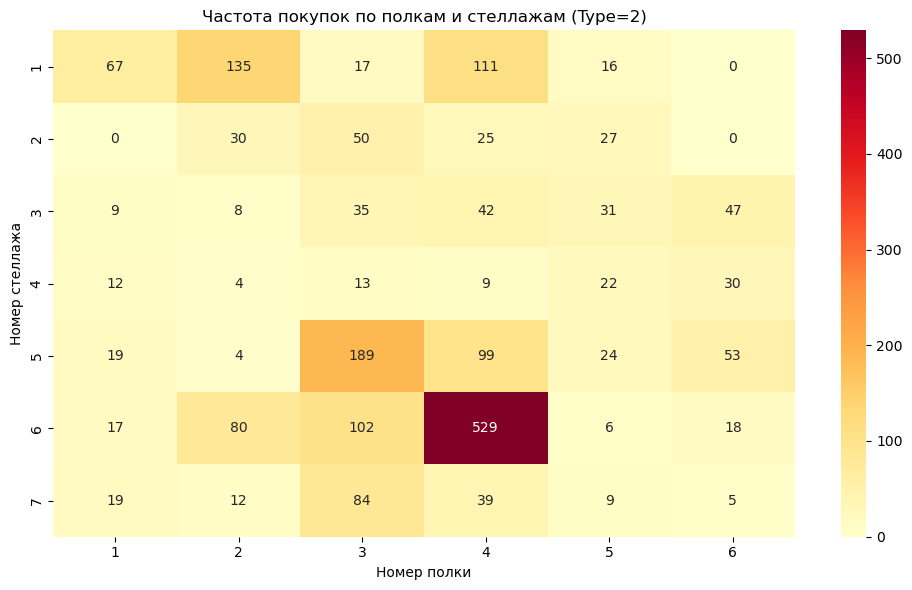

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

purchases_type2 = data_AvB[data_AvB['Type'] == 2]
purchase_frequency = purchases_type2.groupby(['Id_stillage', 'Id_shelf'])['Quantity'].sum().reset_index()
purchase_frequency = purchase_frequency.sort_values(by=['Id_stillage', 'Id_shelf'])
print(purchase_frequency)

heatmap_data = purchase_frequency.pivot(index='Id_stillage', columns='Id_shelf', values='Quantity').fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Частота покупок по полкам и стеллажам (Type=2)")
plt.xlabel("Номер полки")
plt.ylabel("Номер стеллажа")
plt.tight_layout()
plt.show();

# A/B тест

In [36]:
import scipy.stats as st

- Вычислить общие траты с 1 стеллажа отдельно для 1 и для 2 варианта выкладки (если была проведена предобработка данных, описать какая именно).

- Выполнить стат. тест (сравнить средние): пояснить, какой тест был выбран (и почему), как устроена критическая область, какие есть другие варианты тестов (и если есть, сказать про границы их применимости).

- Какой вывод можно сделать?

A/B Test Results:
Средняя трата для Type=1: 119.17
Средняя трата для Type=2: 109.00
T-статистика: 2.2149
P-значение: 0.0272
Различие статистически значимо: можно утверждать, что тип выкладки влияет на траты.


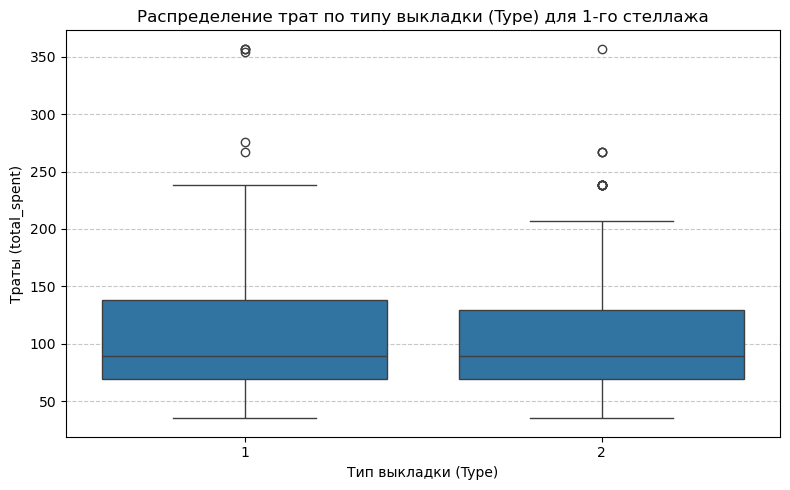

In [88]:
from scipy.stats import ttest_ind

shelf1_data = data_AvB[data_AvB["Id_stillage"] == 1].copy()
shelf1_data.loc[:, "total_spent"] = shelf1_data["Price"] * shelf1_data["Quantity"]

a = shelf1_data[shelf1_data["Type"] == 1]["total_spent"]
b = shelf1_data[shelf1_data["Type"] == 2]["total_spent"]

stat, p_value = ttest_ind(a, b, equal_var=False)

print("A/B Test Results:")
print(f"Средняя трата для Type=1: {a.mean():.2f}")
print(f"Средняя трата для Type=2: {b.mean():.2f}")
print(f"T-статистика: {stat:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Различие статистически значимо: можно утверждать, что тип выкладки влияет на траты.")
else:
    print("Различие НЕ статистически значимо: тип выкладки не оказывает значимого влияния.")

plt.figure(figsize=(8, 5))
sns.boxplot(x="Type", y="total_spent", data=shelf1_data)
plt.title("Распределение трат по типу выкладки (Type) для 1-го стеллажа")
plt.xlabel("Тип выкладки (Type)")
plt.ylabel("Траты (total_spent)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

Для проверки гипотезы о различии средних трат между двумя группами (Type = 1 и Type = 2) был выбран независимый t-тест (Welch’s t-test) из библиотеки scipy.stats. Этот тест применим, когда, сравниваются две независимые группы; данные количественные и допускается разная дисперсия в группах (в отличие от классического t-теста, где дисперсии равны).
Уровень значимости: α = 0.05
Если p-value < 0.05, значит различие статистически значимо, и мы отвергаем нулевую гипотезу (что разницы нет).
На графике (boxplot) видно распределение трат по двум типам выкладки. Среднее значение у Type = 1 оказалось немного выше, но не кардинально.
Средняя трата (Type=1): 119.17
Средняя трата (Type=2): 109.00
Т-статистика: 2.2149
P-значение: 0.0272
Вывод:
P-значение меньше 0.05 - различие статистически значимо.
Можно утверждать, что тип выкладки оказывает влияние на траты покупателей.

# TOP-5

И для первого, и для второго варианта расположения товаров выяснить те пять SKU (кодов SKU), которые покупались чаще всего (т.е. сравнить лидеров по Quantity).

   Top-5 SKU (Type=1)  Quantity (Type=1)  Top-5 SKU (Type=2)  \
0             3255206                120             3255206   
1             3255795                110             3203097   
2             3203097                 98             3255795   
3             3203086                 86             3203104   
4             3203104                 71             3203090   

   Quantity (Type=2)  
0                104  
1                 97  
2                 94  
3                 84  
4                 71  


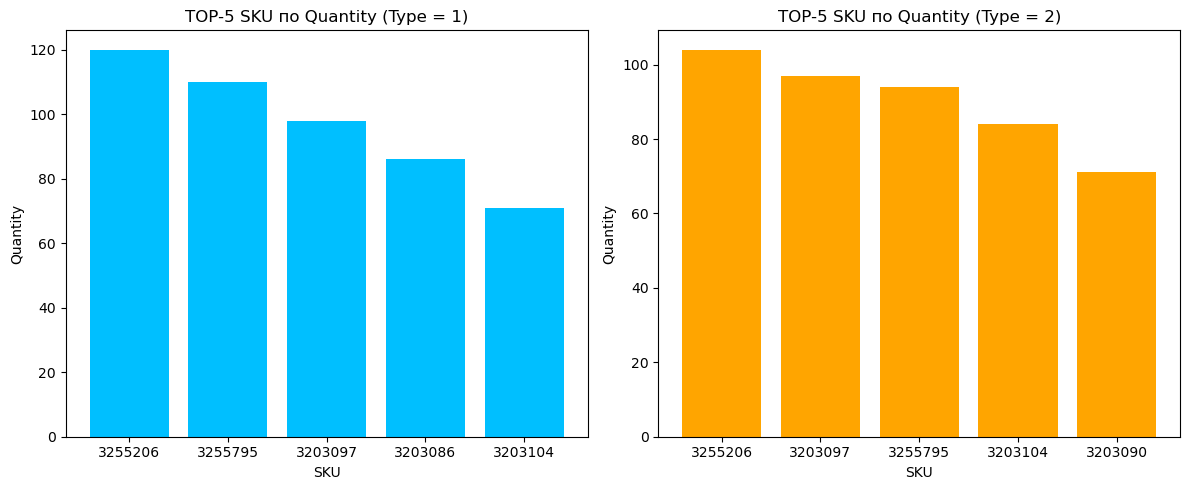

In [90]:
sku_popularity = data_AvB.groupby(['Type', 'SKU'])['Quantity'].sum().reset_index()
top5_type1 = sku_popularity[sku_popularity['Type'] == 1].sort_values(by='Quantity', ascending=False).head(5)
top5_type2 = sku_popularity[sku_popularity['Type'] == 2].sort_values(by='Quantity', ascending=False).head(5)
top5_comparison = pd.DataFrame({
    'Top-5 SKU (Type=1)': top5_type1['SKU'].values,
    'Quantity (Type=1)': top5_type1['Quantity'].values,
    'Top-5 SKU (Type=2)': top5_type2['SKU'].values,
    'Quantity (Type=2)': top5_type2['Quantity'].values})
print(top5_comparison)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

top5_type1 = data_AvB[data_AvB["Type"] == 1].groupby("SKU")["Quantity"].sum().sort_values(ascending=False).head(5)
axes[0].bar(top5_type1.index.astype(str), top5_type1.values, color='deepskyblue')
axes[0].set_title("TOP-5 SKU по Quantity (Type = 1)")
axes[0].set_xlabel("SKU")
axes[0].set_ylabel("Quantity")
top5_type2 = data_AvB[data_AvB["Type"] == 2].groupby("SKU")["Quantity"].sum().sort_values(ascending=False).head(5)
axes[1].bar(top5_type2.index.astype(str), top5_type2.values, color='orange')
axes[1].set_title("TOP-5 SKU по Quantity (Type = 2)")
axes[1].set_xlabel("SKU")
axes[1].set_ylabel("Quantity")
plt.tight_layout()
plt.show();

# Дополнительные вопросы:

1. Что наиболее вероятно означает переменная type_good?

2. Какие ты знаешь другие функции в pandas, позволяющие создавать столбцы по примеру* type_good?

3. *Как корректно проверить связь между Time_after_prev (временем, которое прошло с момента покупки предыдущего товара) и Price (ценой товара)? Есть ли потенциальные проблемы в данных, и если да, как их можно решить? Можешь ли найти, с чем связано увеличение Time_after_prev для некоторых товаров?

4. **Как ты считаешь, чем именно вызвана разница в продажах с 1 стеллажа для 1 и 2 типа выкладки?

*P.S. Составители ТЗ приносят извинения за не самую удачную не-гуглящуюся формулировку.

**1. Что наиболее вероятно означает переменная type_good**  
type_good — это тип товара, скорее всего, означает категорию товара (их всего три - 0, 1 и 2), которую хотели протестировать, например, насколько новый продукт, премиальность и т.д.  

**2. Какие ты знаешь другие функции в pandas, позволяющие создавать столбцы по примеру type_good?**  
df['new_col'] = df['col1'] + df['col2'] — арифметика по столбцам  
df['new_col'] = df['col'].apply(lambda x:...) — применение функции к значениям  
df['new_col'] = np.where(...) — условные конструкции  
df['new_col'] = df['col'].map(словарь) — отображение по словарю  

**3. Как корректно проверить связь между Time_after_prev и Price? Есть ли потенциальные проблемы в данных?**  
Можно посчитать корреляцию:
df[['Time_after_prev', 'Price']].corr()

Построить scatterplot:
sns.scatterplot(x='Price', y='Time_after_prev', data=df)', y='Time_after_prev', data=df)

**Потенциальные проблемы:**
Возможны выбросы в Price и Time_after_prev
Time_after_prev может быть не только следствием высокой цены, но и перемещением к другому стеллажу, долгим выбором, перегрузкой покупателя.

**4. Как ты считаешь, чем вызвана разница в продажах с 1 стеллажа для 1 и 2 типа выкладки?**  
Возможные гипотезы: 
- В Type 1 изменили расположение товаров — популярные товары стали заметнее. 
- Могло быть изменение ассортимента или замена товаров на более привлекательные. 
- Повлияло визуальное оформление или плотность выкладки. 
- Возможно, пользователи в Type 2 были менее вовлечены, в отличие от Type 1. 
- A/B разница могла быть вызвана комбинацией факторов: физическим расположением, восприятием упаковки, вовлечённостью покупателя и изменениями в ассортименте.